# When to go to the WU Mensa

We want to quickly showcase how the Open Data of WU Vienna can be used to estimate the number of students and their arrival time at the WU Mensa.

In [334]:
#import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime

## Get and combine the necessary data

We will use three different data sources for this experiment
* Information about times and lecture rooms of the courses to extract the end time of each lecture
* Information about the lecture rooms to extract the capacity and location
* Geo information about the entrances of the buildings to determin the distance between lecture room and mensa


In [335]:
#get the course
course_events='http://data.wu.ac.at/dataset/812a45f5-3f69-457a-b496-dbd598456829/resource/bfe6cda0-258f-47b2-876d-2913e5459a66/download/allcoursesandevents15w.csv'
d_courseEvents= pd.read_csv(course_events,parse_dates=['start', 'end'], dtype={'course_id': object})
d_courseEvents.head()

,course_id,semester,name,roomcode,buildingname,start,end
0,0001,15W,Grundlagen der Volkswirtschaftslehre,TC.0.10 Audimax,TC,2015-10-12 13:30:00,2015-10-12 16:00:00
1,0001,15W,Grundlagen der Volkswirtschaftslehre,TC.0.10 Audimax,TC,2015-10-14 13:30:00,2015-10-14 16:00:00
2,0001,15W,Grundlagen der Volkswirtschaftslehre,TC.0.10 Audimax,TC,2015-10-19 13:30:00,2015-10-19 16:00:00
3,0001,15W,Grundlagen der Volkswirtschaftslehre,TC.0.10 Audimax,TC,2015-10-21 13:30:00,2015-10-21 16:00:00
4,0001,15W,Grundlagen der Volkswirtschaftslehre,TC.0.10 Audimax,TC,2015-10-28 13:30:00,2015-10-28 16:00:00


In [336]:
#get room information
room_info='http://data.wu.ac.at/dataset/fed3bae6-397c-4f4c-9c14-15aa8443d268/resource/d17a0d32-562a-4b37-9f32-ce06c4482583/download/allcampusrooms.csv'
d_roomInfo=pd.read_csv(room_info)
d_roomInfo.head()

,location_id,capacity,roomcode,floorname,buildingname,category_en,category_de,roomname_en,roomname_de,fancyname_de,fancyname_en
0,001_10_OG01_110900,3,LC.2.169,OG01,LC,Tandem room,Tandemraum,LC.2.169 Tandem room,LC.2.169 Tandemraum,Tandemraum,Tandem room
1,001_20_OG01_350300,8,D1.1.002,OG01,D1,Project room,Projektraum,D1.1.002,D1.1.002,NaN,NaN
2,001_10_OG01_310800,8,LC.2.024,OG01,LC,Project room,Projektraum,LC.2.024,LC.2.024,NaN,NaN
3,001_10_OG01_112500,15,LC.2.232,OG01,LC,Meeting room,Besprechungsraum,LC.2.232,LC.2.232,NaN,NaN
4,001_30_OG01_530000,8,D2.1.512,OG01,D2,Meeting room,Besprechungsraum,D2.1.512,D2.1.512,NaN,NaN


In [337]:
#load data about entrance coordinates for the lecture rooms
entrance_coord='http://data.wu.ac.at/dataset/cc76ca38-a904-4909-b621-1f7be63b821b/resource/8b67906a-7459-46eb-b4e0-ee312150a330/download/entrancesroomsmapping.csv'
d_entrCoords= pd.read_csv(entrance_coord, dtype={'course_id': object})
d_entrCoords.head()

,location_id,entrance_id,entrance_name_de,entrance_name_en,latitude,longitude
0,001_10_E101_310100,10251,LC Eingang,LC Entrance,48.213554,16.408457
1,001_10_E101_310200,10251,LC Eingang,LC Entrance,48.213554,16.408457
2,001_10_E101_310300,10251,LC Eingang,LC Entrance,48.213554,16.408457
3,001_10_E101_310500,10251,LC Eingang,LC Entrance,48.213554,16.408457
4,001_10_E101_310600,10251,LC Eingang,LC Entrance,48.213554,16.408457


In [338]:
#merge tables on roomcode
merge = d_roomInfo.merge(d_courseEvents, on='roomcode')

#select the necessary columns
data = merge[['roomcode', 'location_id', 'end','capacity', ]].copy()
data.head()

,roomcode,location_id,end,capacity
0,D1.1.002,001_20_OG01_350300,2015-11-27 14:00:00,8
1,D1.1.002,001_20_OG01_350300,2015-12-18 14:00:00,8
2,D1.1.002,001_20_OG01_350300,2015-12-07 17:00:00,8
3,D1.1.002,001_20_OG01_350300,2015-10-12 14:00:00,8
4,D1.1.002,001_20_OG01_350300,2015-10-13 14:00:00,8


In [339]:
#merge the table with our other data
data= pd.merge(data, d_entrCoords[['location_id', 'latitude', 'longitude']], how='right', on=['location_id'])
data.head()

,roomcode,location_id,end,capacity,latitude,longitude
0,D1.1.002,001_20_OG01_350300,2015-11-27 14:00:00,8,48.213301,16.409166
1,D1.1.002,001_20_OG01_350300,2015-12-18 14:00:00,8,48.213301,16.409166
2,D1.1.002,001_20_OG01_350300,2015-12-07 17:00:00,8,48.213301,16.409166
3,D1.1.002,001_20_OG01_350300,2015-10-12 14:00:00,8,48.213301,16.409166
4,D1.1.002,001_20_OG01_350300,2015-10-13 14:00:00,8,48.213301,16.409166


In [340]:
#simple estimation of the number of students which go to the mensa
ratio_of_students_in_room=0.75
ratio_of_students_going_to_mensa=0.5
data['est_students'] = data['capacity'] * ratio_of_students_in_room * ratio_of_students_going_to_mensa
data.head()

,roomcode,location_id,end,capacity,latitude,longitude,est_students
0,D1.1.002,001_20_OG01_350300,2015-11-27 14:00:00,8,48.213301,16.409166,3
1,D1.1.002,001_20_OG01_350300,2015-12-18 14:00:00,8,48.213301,16.409166,3
2,D1.1.002,001_20_OG01_350300,2015-12-07 17:00:00,8,48.213301,16.409166,3
3,D1.1.002,001_20_OG01_350300,2015-10-12 14:00:00,8,48.213301,16.409166,3
4,D1.1.002,001_20_OG01_350300,2015-10-13 14:00:00,8,48.213301,16.409166,3


#Filter for this week

In [341]:
#get current date and weekday
today = datetime.date.today()
weekday = today.weekday()

#get start and end of this week
start_of_week = today - datetime.timedelta(days=weekday)
end_of_week   = start_of_week + datetime.timedelta(days=5)

#generate filter for lectures which happen this week
mask = (data['end'] > start_of_week) & (data['end'] <= end_date)
cur_week= data.loc[mask].copy()
cur_week.head()

,roomcode,location_id,end,capacity,latitude,longitude,est_students
20,TC.5.13,001_20_OG05_063900,2016-01-11 14:00:00,60,48.212588,16.410134,22.5
22,TC.5.13,001_20_OG05_063900,2016-01-12 17:00:00,60,48.212588,16.410134,22.5
24,TC.5.13,001_20_OG05_063900,2016-01-12 14:30:00,60,48.212588,16.410134,22.5
44,TC.5.13,001_20_OG05_063900,2016-01-14 14:30:00,60,48.212588,16.410134,22.5
57,TC.5.13,001_20_OG05_063900,2016-01-11 21:30:00,60,48.212588,16.410134,22.5


#Filter only lectures which end between 11 and 15 o'clock

In [342]:
#first we create an index 
time_idx = pd.DatetimeIndex(cur_week.end)
cur_week['date'] = time_idx.date.astype('datetime64')
cur_week['weekday'] = time_idx.weekday
cur_week['hour'] = time_idx.hour
cur_week['min'] = time_idx.minute

#map numerical weekdays to strings
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
cur_week['weekday'] = cur_week['weekday'].apply(lambda x: days[x])

#filter for all lectures between 11 and 15
mask = (cur_week['hour'] > 11) & (cur_week['hour'] <= 15)
filtered_week= cur_week.loc[mask].copy()
filtered_week.head(5)

,roomcode,location_id,end,capacity,latitude,longitude,est_students,date,weekday,hour,min
20,TC.5.13,001_20_OG05_063900,2016-01-11 14:00:00,60,48.212588,16.410134,22.5,2016-01-11,Mon,14,0
24,TC.5.13,001_20_OG05_063900,2016-01-12 14:30:00,60,48.212588,16.410134,22.5,2016-01-12,Tue,14,30
44,TC.5.13,001_20_OG05_063900,2016-01-14 14:30:00,60,48.212588,16.410134,22.5,2016-01-14,Thur,14,30
64,TC.5.13,001_20_OG05_063900,2016-01-14 12:30:00,60,48.212588,16.410134,22.5,2016-01-14,Thur,12,30
86,TC.5.13,001_20_OG05_063900,2016-01-13 12:00:00,60,48.212588,16.410134,22.5,2016-01-13,Wed,12,0


#Aggregate by weekday, hour and minute

In [345]:
#groupby and aggregate
g_wh = filtered_week.groupby(['weekday', 'hour','min']).sum()
g_wh=g_wh[['est_students']]

#The top 10 worst times to go to the mensa
g_wh.sort(['est_students'], ascending=[0]).head(10)

,,,est_students
weekday,hour,min,
Tue,13,0,291.00
Wed,12,0,281.25
Tue,12,0,251.25
Fri,13,0,232.50
Wed,13,0,213.75
Thur,12,0,208.50
Fri,12,30,202.50
Mon,15,0,195.00
Thur,13,0,187.50


#Lets do some plotting
##What are the worst days and times of this week to go to the mensa?

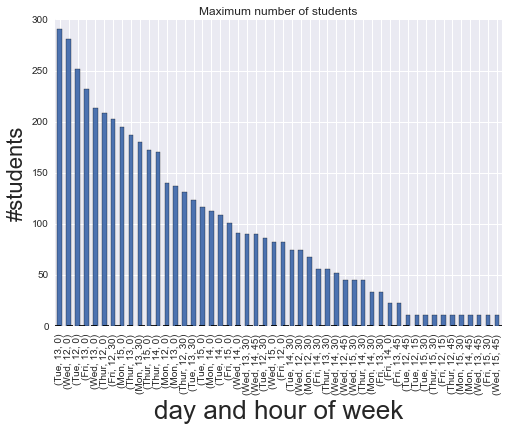

In [346]:
#sort by estimated #of students
ax=g_wh.sort(['est_students'], ascending=[0]).plot(y=['est_students'], kind='bar', legend=False, title="Maximum number of students")
ax.set_xlabel("day and hour of week",fontsize=26)
ax.set_ylabel("#students",fontsize=22)
plt.show()

# Better estimation - incooperating the distance to the mensa


##Get Mensa coordinates
The mensa building is D1 and we get the coordinats from the All main entrances at WU Vienna dataset
(http://data.wu.ac.at/dataset/entrances/resource/f92ecfd9-3f0a-4dfd-b6ff-1b0acf0b5340)

In [304]:
mensa_lat=48.21330080810941
mensa_long=16.409165877046618

#Function to estimate the distance from lecture building to mensa entrance
 

In [347]:
import math

#from http://www.johndcook.com/blog/python_longitude_latitude/
def distance_on_unit_sphere(lat1, long1, lat2, long2):
 
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
         
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
         
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
         
    # Compute spherical distance from spherical coordinates.
         
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
     
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
 
    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    
    #convert to kilometers by multiplying it with 6373*1000
    m = arc*6373*1000

    #add additional 100m to cater for walking up and down in buildings
    return (m + 100)

##Add estimated distance to our data

In [348]:
filtered_week['distance'] = filtered_week.apply(lambda row: distance_on_unit_sphere(row['latitude'], row['longitude'], mensa_lat, mensa_long), axis=1)
filtered_week.head()
#distance_on_unit_sphere(48.213301, 16.409166, mensa_lat, mensa_long)

,roomcode,location_id,end,capacity,latitude,longitude,est_students,date,weekday,hour,min,distance
20,TC.5.13,001_20_OG05_063900,2016-01-11 14:00:00,60,48.212588,16.410134,22.5,2016-01-11,Mon,14,0,206.92657
24,TC.5.13,001_20_OG05_063900,2016-01-12 14:30:00,60,48.212588,16.410134,22.5,2016-01-12,Tue,14,30,206.92657
44,TC.5.13,001_20_OG05_063900,2016-01-14 14:30:00,60,48.212588,16.410134,22.5,2016-01-14,Thur,14,30,206.92657
64,TC.5.13,001_20_OG05_063900,2016-01-14 12:30:00,60,48.212588,16.410134,22.5,2016-01-14,Thur,12,30,206.92657
86,TC.5.13,001_20_OG05_063900,2016-01-13 12:00:00,60,48.212588,16.410134,22.5,2016-01-13,Wed,12,0,206.92657


## Estimate the arrival time of the students based on lecture end time and distance to mensa

In [351]:
#compute additional delay considering an average walking speed of 1m/s (https://www.google.at/search?client=safari&rls=en&q=how+fast+do+we+walk+on+average&ie=UTF-8&oe=UTF-8&gfe_rd=cr&ei=NDqWVrHkNcGF8QfC0L7oDw#q=how+fast+do+we+walk+on+average+meters+per+second)

avg_walking_speed=1 # 1 m/s

def estimated_arrival(end, distance, avg_walking_speed):
    """ Estimate the arrival time based on the lecture end time and the time to walk from the lecture to the mensa"""
    walking_time= distance*avg_walking_speed
    return end+pd.Timedelta(seconds=walking_time)

filtered_week['avg_arrival_time'] = filtered_week.apply(lambda row: estimated_arrival(row['end'], row['distance'],avg_walking_speed ), axis=1)


est_data=filtered_week[['est_students','weekday','hour','min','distance','avg_arrival_time']].copy()

#build again an index on the arrival time
time_idx = pd.DatetimeIndex(est_data.avg_arrival_time)
est_data['arr_min'] = time_idx.minute

est_data.head()

,est_students,weekday,hour,min,distance,avg_arrival_time,arr_min
20,22.5,Mon,14,0,206.92657,2016-01-11 14:03:26.926570,3
24,22.5,Tue,14,30,206.92657,2016-01-12 14:33:26.926570,33
44,22.5,Thur,14,30,206.92657,2016-01-14 14:33:26.926570,33
64,22.5,Thur,12,30,206.92657,2016-01-14 12:33:26.926570,33
86,22.5,Wed,12,0,206.92657,2016-01-13 12:03:26.926570,3


In [366]:
g_data = est_data.sort(['weekday','hour','arr_min'], ascending=[1,1,1])
g_data= g_data.groupby(['weekday', 'hour','min']).sum()

g_data['avoid'] = g_data['est_students'] > 100
g_data.head()


est_students     distance  arr_min  avoid
weekday hour min                                           
Fri     12   0           82.50  1325.235402       19  False
             15          11.25   206.926570       18  False
             30         202.50  2961.473604      347   True
        13   0          232.50  3177.277692       47   True
             30          33.75   681.205101       99  False

Populating the interactive namespace from numpy and matplotlib


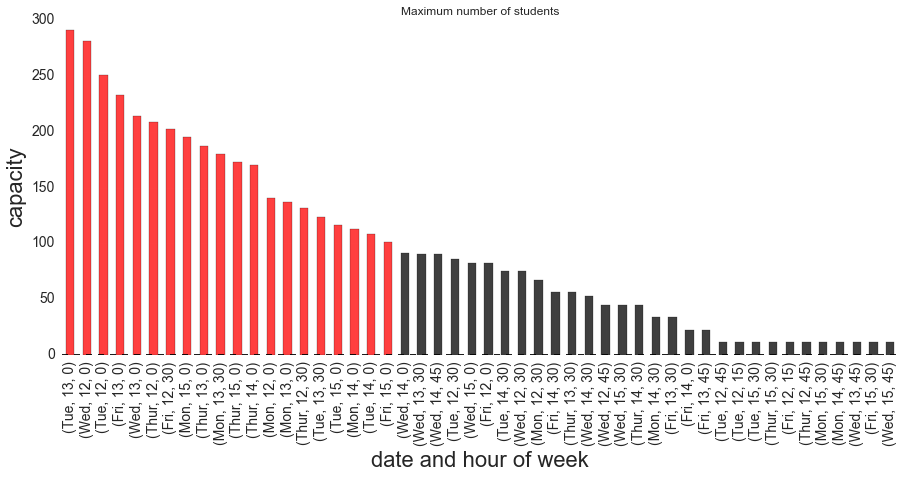

In [368]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
ax=g_data.sort(['est_students'], ascending=[0]).plot( y=['est_students'], 
                kind='bar', legend=False, 
                title="Maximum number of students",
                color=g_data.sort(['est_students'], ascending=[0]).avoid.map({True: 'r', False: 'k'})
               ,alpha=0.75)
              
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

ax.set_xlabel("date and hour of week",fontsize=22)
ax.set_ylabel("capacity",fontsize=22)
plt.show()